In [1]:
#problem statement

In [2]:
##use relevant machine learning model to protect total sales using features like money spent on advertising /marketing on individual items

In [5]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# load the data
data=pd.read_csv('Advertising.csv')

In [7]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
# gives the information of the first five rows
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
# gives the information about the last five rows
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [10]:
# gives the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# insights
1) in some cases zero amount spent on radio
2) the cost of advertisiment on newaspaper is less,compared to the tv

# Exploratory Data Analysis

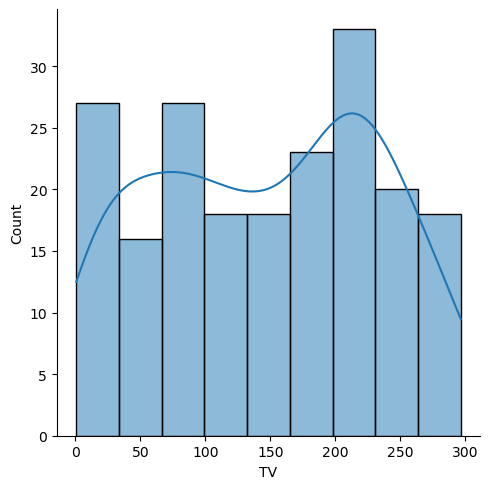

In [13]:
# univariate data analysis
sns.displot(x='TV',data=data,kde=True)

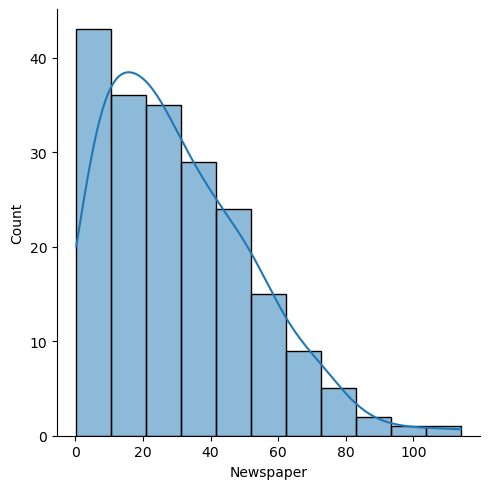

In [15]:
sns.displot(x=data['Newspaper'],kde=True)

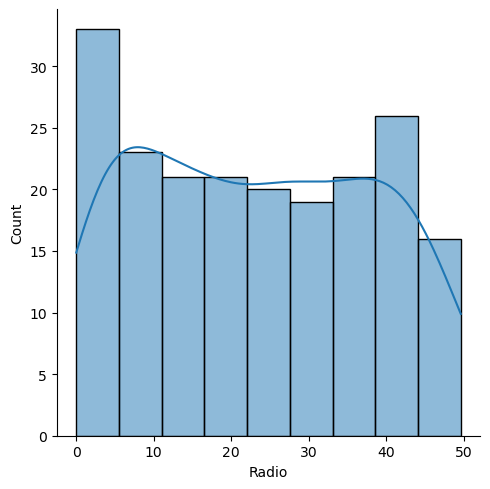

In [16]:
sns.displot(x=data['Radio'],kde=True)

In [17]:
# Bivariate Analysis.
# bivariate analysis are performed when the input and output are known
# 1st variable will be inputs
# 2nd variable will be outputs

<Axes: xlabel='TV', ylabel='Sales'>

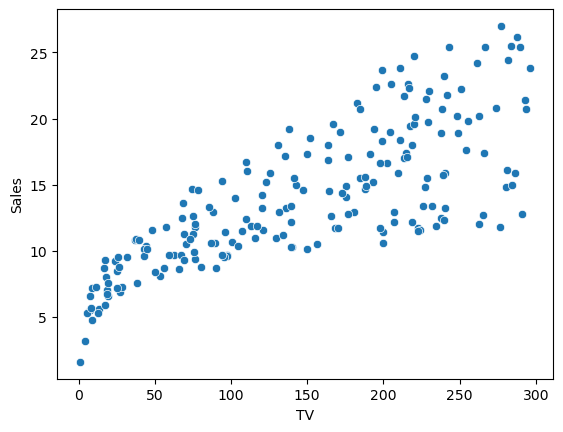

In [18]:
sns.scatterplot(x='TV',y='Sales',data=data)

In [19]:
# as we can see from the scatter plot that ,the amount spent on tv for advertisement increases the sales also increases

<Axes: xlabel='Radio', ylabel='Sales'>

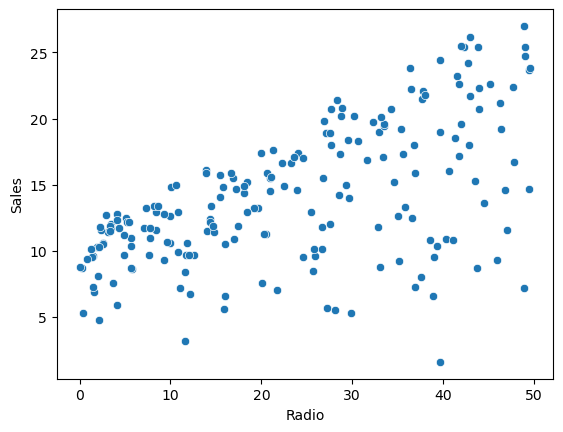

In [20]:
sns.scatterplot(x='Radio',y='Sales',data=data)

In [21]:
# as we can see from the scatter graph that there is no increases in sales eventhough we spent amount on radio advertisement

<Axes: xlabel='Newspaper', ylabel='Sales'>

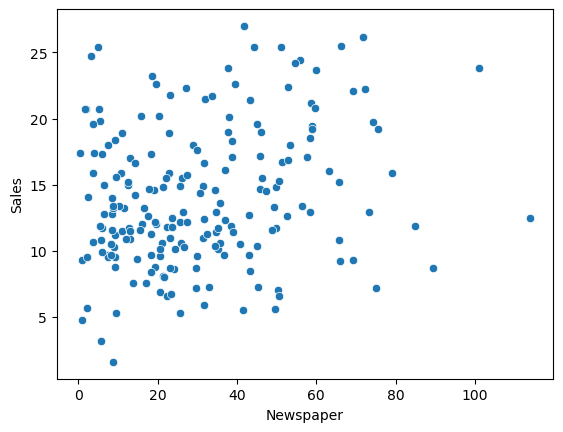

In [22]:
sns.scatterplot(x='Newspaper',y='Sales',data=data)

In [23]:
# there is no point in spending the money on newspaper advertisement

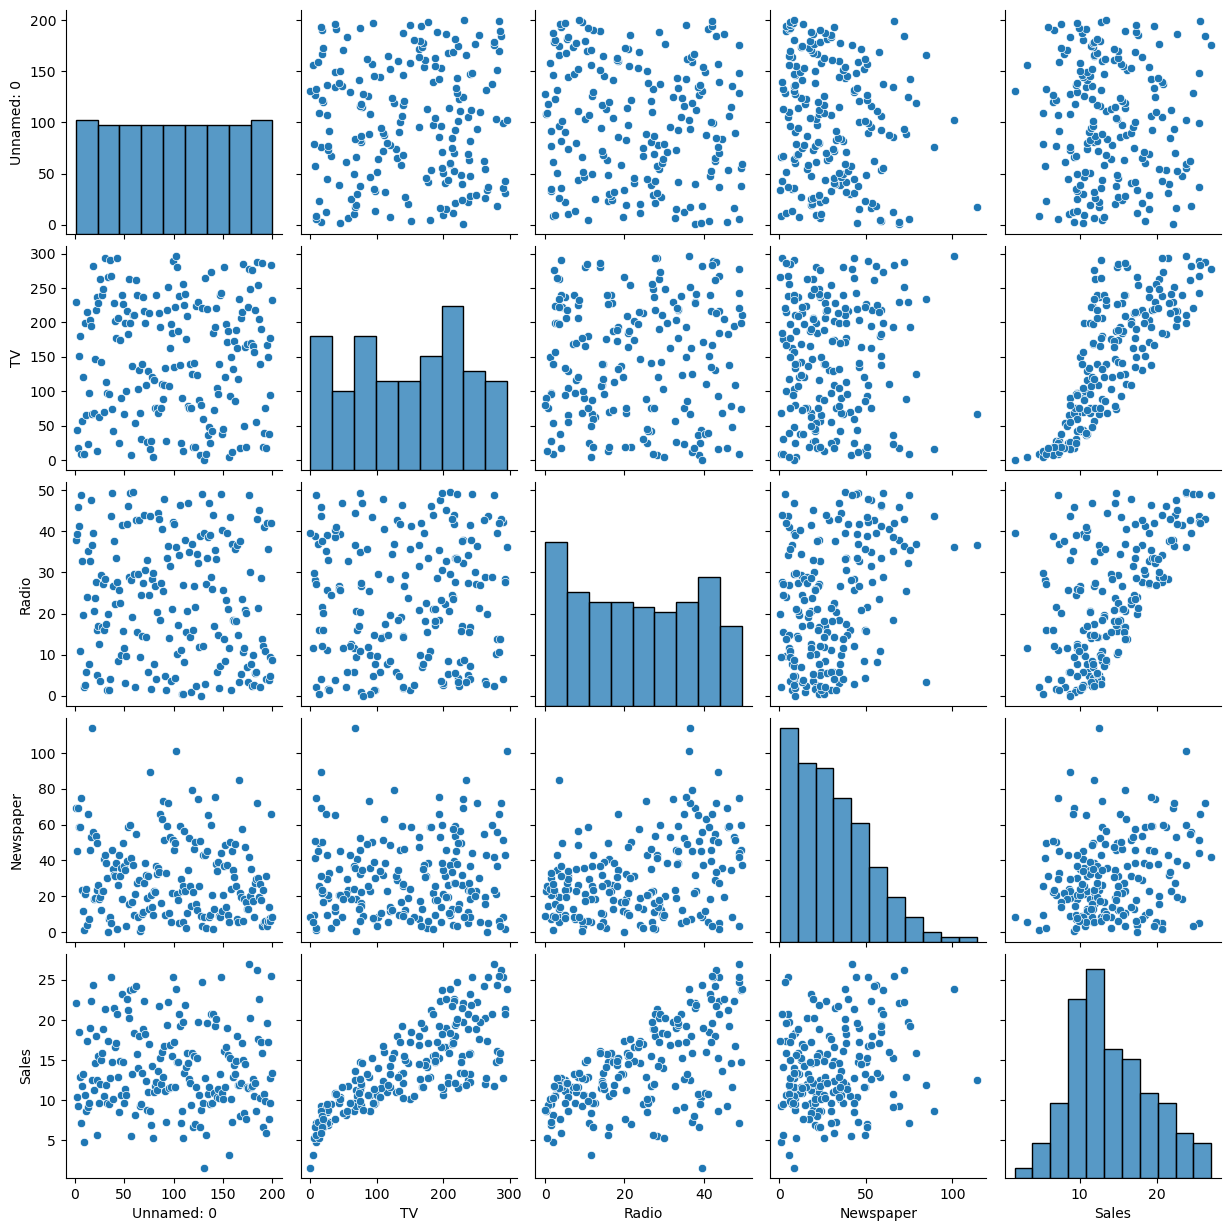

In [24]:
# multivariate analysis
sns.pairplot(data)

# data pre-processing

In [25]:
# check for the missing values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [26]:
# there is no missing values

In [27]:
# step2 -converte categorical data into numerical

<Axes: xlabel='TV'>

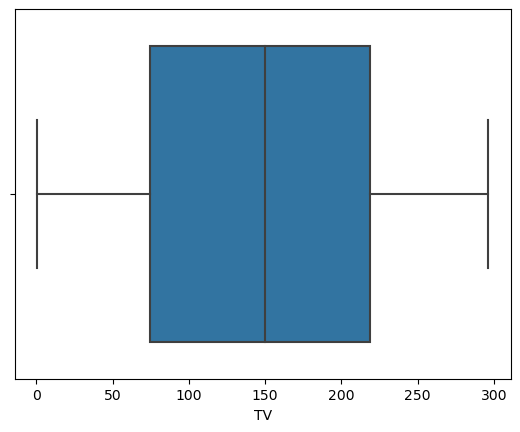

In [28]:
#step 3- check for the outliers
sns.boxplot(x='TV',data=data)

<Axes: xlabel='Newspaper'>

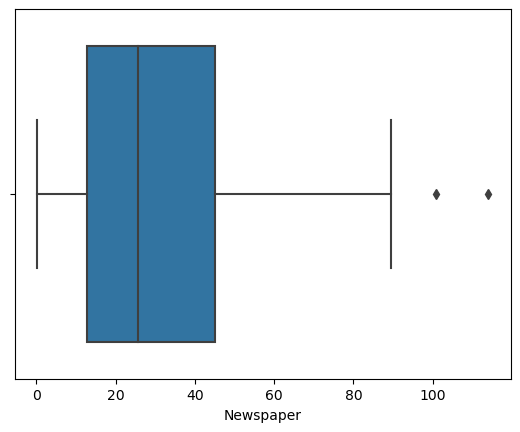

In [29]:
sns.boxplot(x='Newspaper',data=data)

<Axes: xlabel='Radio'>

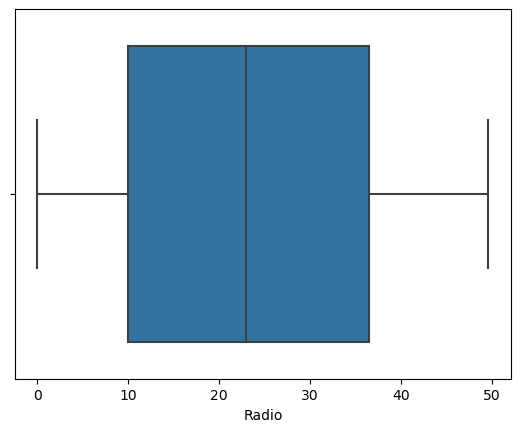

In [31]:
sns.boxplot(x='Radio',data=data)

In [32]:
# we found the oyliers in the newspaper

In [33]:
#how to handle outliers
Q1=data['Newspaper'].quantile(0.25)

In [34]:
Q1

12.75

In [35]:
Q3=data['Newspaper'].quantile(0.75)
Q3

45.1

In [36]:
#range
IQR=Q3-Q1
IQR

32.35

In [37]:
# find the lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('Lower_limit:',lower_limit)
upper_limit=Q3+1.5*IQR
print('Upper_limit:',upper_limit)

Lower_limit: -35.775000000000006
Upper_limit: 93.625


In [38]:
# find out the outliers which are lesser than the lower limit
data.loc[data['Newspaper']<lower_limit]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [39]:
# find out the outliers which are greater than the upper limit
data.loc[data['Newspaper']>upper_limit]

,Unnamed: 0,TV,Radio,Newspaper,Sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


In [40]:
data.loc[data['Newspaper']>upper_limit,'Newspaper']=data['Newspaper'].median()

<Axes: xlabel='Newspaper'>

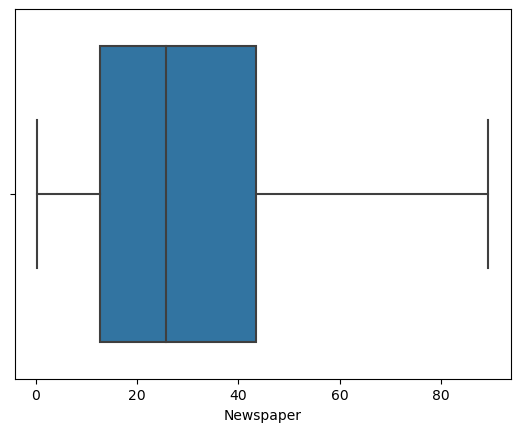

In [41]:
sns.boxplot(x='Newspaper',data=data)

In [42]:
# scaling the continuous variable

In [46]:
# transformation

In [43]:
#balancing the data

In [44]:
# feature selection

In [45]:
# drop unnecessary column

In [47]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [48]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: >

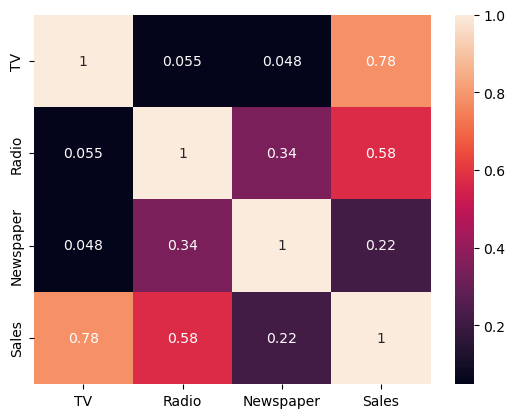

In [49]:
# checking the correlation
sns.heatmap(data.corr(),annot=True)

In [50]:
# model creation
x=data[['TV','Radio','Newspaper']]
y=data['Sales']

In [51]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [52]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [53]:
x_train.shape

(140, 3)

In [54]:
x_test.shape

(60, 3)

In [56]:
# creating the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred=model.predict(x_test)

In [58]:
y_pred

array([16.56622129, 21.19629105, 21.56238688, 10.88309172, 22.22518968,
       13.35134536, 21.21185118,  7.34578696, 13.28180806, 15.12877207,
        9.01680516,  6.51665134, 14.29096959,  8.97062449,  9.45350415,
       12.00297213,  8.90727704, 16.16669664, 10.29220368, 18.74013635,
       19.76845202, 13.16994572, 12.50161956, 21.53853285,  7.60918067,
        5.6039813 , 20.93032937, 11.81099992,  9.07701481,  8.51571567,
       12.17849654,  9.96882387, 21.73711532, 12.76276934, 18.10871078,
       20.0949282 , 14.27092122, 20.94422324, 10.84385466,  4.37214715,
        9.51102297, 12.41157141, 10.16590644,  8.08750962, 13.16938565,
        5.21775327,  9.28153513, 14.09923882,  8.6836478 , 11.66408229,
       15.72277858, 11.63536272, 13.34338267, 11.14597336,  6.33127708,
        9.75750297,  9.41978404, 24.26856593,  7.69156725, 12.15964826])

In [59]:
model.coef_

array([0.04412906, 0.19959794, 0.00662761])

In [60]:
model.intercept_

2.702049604502786

In [61]:
# evaluate the model performance

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [64]:
mse=mean_squared_error(y_test,y_pred)
mse

3.7716139064161376

In [65]:
rmse=np.sqrt(mse)
rmse

1.942064341471759

In [66]:
mbe=mean_absolute_error(y_test,y_pred)
mbe

1.5001940662195643

In [67]:
print("R2_score:",r2_score(y_test,y_pred))

R2_score: 0.8618689614451722


# conclusion

In [68]:
# r2_score is 86%
# model is good
# 86% of the model is predicted right
# 14 % mode is predicted wrong